# Эмпирический риск и функция потерь в задаче бинарной классификации

In [ ]:
# Модули, настройка

import numpy as np
np.random.seed(seed=1)
import pandas as pd
from matplotlib import pyplot as plt, cm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Имеются $m$ наблюдений (объектов), каждый объект описывается $n$ признаками.
<br><br>

Ообзначения:
- $X^m \in \mathbb{R}^{m \times n}$ (далее просто $X$) &mdash; матрица признаков;
- $x_i = (X_{i,:})^T=\{x_{i,1},...,x_{i,n}\}^T$ &mdash; вектор признаков $i$-го объекта, $i=1...m$;
- $y$ &mdash; вектор целевых признаков;
- $w = \{w_1,...,w_n\}^T$ &mdash; вектор коэффициентов линейной модели;
- $w_0$ &mdash; свободный член линейной модели.
<br><br>

Тогда линейная комбинация вектора признаков $i$-го объекта и коэффициентов модели может быть записана следующим образом (далее будут использоваться обе записи скалярного произведения векторов):
$$ \langle w, x_i\rangle + w_0 = w^T x_i + w_0.$$
<br>

Для удобства записи добавим в матрицу признаков $X$ фиктивный признак 1, а в вектор коэффициентов $w$ свободный член $w_0$:
$$X = \begin{bmatrix} 
    1 & x_{1,1} & \dots & x_{1,n} \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & x_{m,1} & \dots & x_{m,n} 
\end{bmatrix}, w=\{w_0, w_1,...,w_n\}^T.$$
<br>

Тогда линейная комбинация приобретает более компактную форму:
$$w^T x_i.$$
<br>

Пусть ответ линейной модели при классификации $i$-го объекта есть некоторая функция вектора признаков объекта и вектора коэффициентов модели:
$$a_i = a(x_i,w).$$
<br>

Вличина $a_i$ является оценкой целевого признака и часто обозначается как $\hat y_i$. Далее будет пользоваться первым обозначением.
<br>

Введем понятие эмпирического риска и среднего эмпирического риска:
$$Q_L(a,y) = \sum_{i=1}^{m} L(a_i,y_i),$$
$$\bar Q_L(a,y) = \frac{1}{m} \sum_{i=1}^{m} L(a_i,y_i),$$
где $L(a_i,y_i)$ &mdash; функция потерь (loss function) на $i$-м объекте.<br><br>

Функция потерь растет и уменьшается вместе с ошибкой. В задачах классификации наиболее естественным выбором является пороговая функция потерь:
$$T(a_i,y_i) = [y_i \neq a_i].$$
<br>

Введем понятие отступа (margin). Отступ для бинарной классификации $y \in \{-1, 1\}$:
$$M_i = M(a_i, y_i) = a_i y_i = w^T x_i y_i.$$
<br>
Отступ для бинарной классификации $y \in \{0, 1\}$:
$$M_i = M(a_i, y_i) = a_i (2 y_i - 1) = w^T x_i (2 y_i - 1).$$
<br>
В обоих выражениях $w^T$ &mdash; вектор строка, $x_i$ &mdash; вектор-столбец, $y_i$ &mdash; скаляр.
<br><br>

Отступ равен линейной комбинации признаков $i$-го объекта и коэффициентов модели и пропорционален расстоянию от объекта до разделяющей гиперплоскости. Отступ положителен, если объект классифицирован правильно (находится по правильную сторону от гиперплоскости) и отрицателен, если нет. Для вычисления расстояния вместо $w^T$ в формулу отступа следует подставить $\frac{\{w_0,...w_n\}^T}{{\lVert \{w_1,...w_n\} \rVert}_2}$.

Выразим пороговую функцию потерь на $i$-м объекте через отступ:
$$T(M_i) = [M_i < 0].$$
<br>

Эмпирический риск для пороговой функции потерь, соответственно:
$$Q_T(M) = \sum_{i=1}^{m} T(M_i) = \sum_{i=1}^{m} [M_i < 0].$$
<br>
Пороговая функция неудобна тем, что ее производная равна 0 везде, кроме начала координат, где пороговая функция делает скачок. В этой точке ее производная равна отрицательной Дельта-функции Дирака. Такая производная затрудняет поиск минимума эмпирического риска. В машинном обучении используются более удобные дифференцируемые приближения пороговой функции потерь.
<br><br>

---
<br>

Рассмотрим некоторые функции потерь, используемые в задачах бинарной классификации.
<br>

Абсолютная функция потерь:
$$A(a_i,y_i) = |y_i - a_i|.$$
<br>

Выразим абсолютную функцию потерь через отступ на примере классификации $y_i \in \{-1,1\}$. В таком случае умножение выражения под модулем на $y_i$ не приведет к его изменению:
$$|y_i(y_i - a_i)| = |y_i - a_i|.$$
<br>

Внесем $y_i$ под скобки. Для $y_i \in \{-1,1\}$ независимо от метки класса $y_i^2 = 1$:
$$A(a_i,y_i) = |y_i^2 - a_i y_i| = |1 - a_i y_i| = |1 - M_i| = A(M_i).$$
<br>

Средний эмпирический риск для абсолютной функции потерь известен как средняя абсолютная ошибка (MAE):
$$MAE(a,y) = Q_A(a,y) = \frac{1}{m} \sum_{i=1}^{m} |y_i - a_i| = \frac{1}{m} \sum_{i=1}^{m} |1 - M_i|.$$
<br>

Квадратичная функция потерь:
$$Q(a_i,y_i) = (y_i - a_i)^2.$$
<br>

Умножим правую часть на $y_i^2 = 1$:
$$y_i (y_i - a_i) y_i (y_i - a_i).$$
<br>

Внесем $y_i$ под скобки:
$$Q(a_i,y_i) = (y_i^2 - y_i a_i)^2 = (1 - M_i)^2.$$
<br>

Средний эмпирический риск для квадратичной функции потерь &mdash; это средняя квадратичная ошибка (MSE):
$$MSE(a,y) = Q_Q(a,y) = \frac{1}{m} \sum_{i=1}^{m} (y_i - a_i)^2 = \frac{1}{m} \sum_{i=1}^{m} (1 - M_i)^2.$$
<br>

Следующие функции потерь на $i$-м объекте также часто используются в задачах классификации:
- $V(M_i) = (1 - M_i)_+$ &mdash; кусочно-линейная (Hinge Loss, SVM);
- $H(M_i) = (-M_i)_+$ &mdash; кусочно-линейная (Hebb's Rule);
- $S(M_i) = 2 / (1 + e^{M_i})$ &mdash; сигмойдная (ANN);
- $L(M_i) = \log(1 + e^{-M_i})$ &mdash; логарифмическая или логистическая (LR);
- $E(M_i) = e^{-M_i}$ &mdash; экспоненциальная (AdaBoost).

Здесь $_+$ &mdash; положительный срез (положительная срезка): $x_+=max(0, x).$

In [ ]:
# Отступ и функции потерь

# Отступ для y ∈ {-1, 1}
def margin(a, y):
  '''Отступ для y ∈ {-1, 1}'''
  return a * y

# Отступ для y ∈ {0, 1}
def margin_01(a, y):
  '''Отступ для y ∈ {0, 1}'''
  return a * (2 * y - 1)

def threshold_loss(m):
  '''Пороговая фукнция потерь для отступа m'''
  return m < 0

def absolute_loss(m):
  '''Абсолютная фукнция потерь для отступа m'''
  return np.abs(1 - m)

def quadratic_loss(m):
  '''Кважратичная фукнция потерь для отступа m'''
  return np.power(1 - m, 2)

def hinge_loss(m):
  '''Кусочно-линейная фукнция потерь Hinge Loss для отступа m'''
  return np.maximum(0, 1 - m)

def hebbs_loss(m):
  '''Кусочно-линейная фукнция потерь Hebb's Rule для отступа m'''
  return np.maximum(0, -m)

def sigmoid_loss(m):
  '''Сигмойдная функция потерь для отступа m'''
  return 2 / (1 + np.exp(m))

def logistic_loss(m):
  '''Сигмойдная функция потерь для отступа m'''
  return np.log(1 + np.exp(-m))

def exponential_loss(m):
  '''Экспоненциальная функция потерь для отступа m'''
  return np.exp(-m)

# Векторизация фнукций
margin = np.vectorize(margin)
threshold_loss = np.vectorize(threshold_loss)
absolute_loss = np.vectorize(absolute_loss)
quadratic_loss = np.vectorize(quadratic_loss)
hinge_loss = np.vectorize(hinge_loss)
hebbs_loss = np.vectorize(hebbs_loss)
sigmoid_loss = np.vectorize(sigmoid_loss)
logistic_loss = np.vectorize(logistic_loss)
exponential_loss = np.vectorize(exponential_loss)

Сравним кривые функций потерь, определенных выше. Для удобного восприятия разместим их на трех диаграммах. На каждой диаграмме для сравнения построим пороговую функцию потерь.

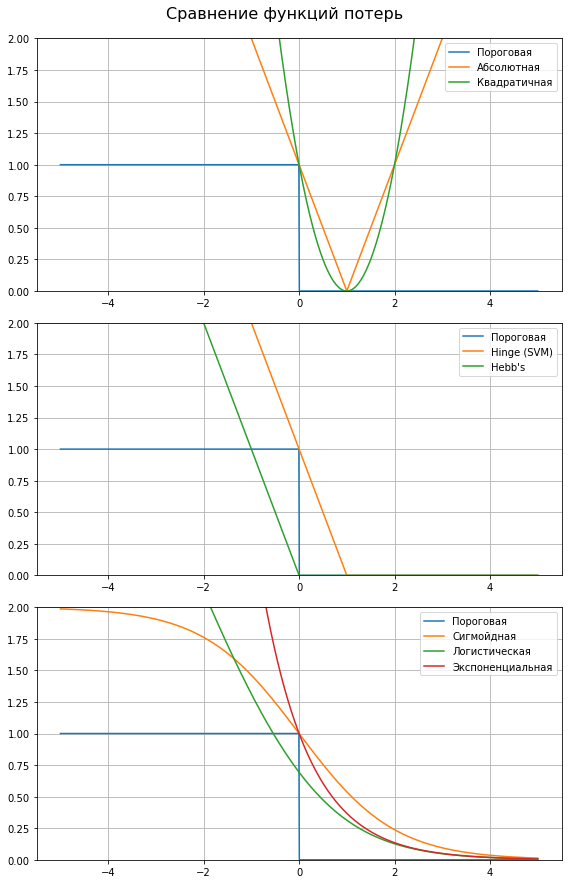

In [ ]:
# Пороговая функция потерь
m = np.linspace(-5, 5, 1000)
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 12))
ax0.plot(m, threshold_loss(m))
ax0.plot(m, absolute_loss(m))
ax0.plot(m, quadratic_loss(m))
ax0.legend(['Пороговая', 'Абсолютная', 'Квадратичная'])
ax0.set_ylim(0, 2)
ax0.grid(True)
ax1.plot(m, threshold_loss(m))
ax1.plot(m, hinge_loss(m))
ax1.plot(m, hebbs_loss(m))
ax1.legend(['Пороговая', 'Hinge (SVM)', 'Hebb\'s'])
ax1.set_ylim(0, 2)
ax1.grid(True)
ax2.plot(m, threshold_loss(m))
ax2.plot(m, sigmoid_loss(m))
ax2.plot(m, logistic_loss(m))
ax2.plot(m, exponential_loss(m))
ax2.legend(['Пороговая', 'Сигмойдная', 'Логистическая', 'Экспоненциальная'])
ax2.set_ylim(0, 2)
ax2.grid(True)
fig.suptitle('Сравнение функций потерь', fontsize=16, y=1.02)
fig.tight_layout()
plt.show()

In [ ]:
# Функции для графиков с осями

def get_shiny_square_axes(axes, axes_arrows=True, axes_labels=('x1', 'x2'), xlim=(-1, 1), ylim=(-1, 1), hw=0.1, lw=1):
  '''Общая настройка осей 2d графиков'''
  if axes_arrows:
    axes.arrow(xlim[0], 0, xlim[1] - xlim[0], 0, length_includes_head=True, head_width=hw, lw=lw, color='r')
    axes.arrow(0, ylim[0], 0, ylim[1] - ylim[0], length_includes_head=True, head_width=hw, lw=lw, color='g')
  axes.grid(True)
  axes.set_aspect(aspect=1) # adjustable='datalim'
  axes.set_axisbelow(True)
  axes.set_xlim(xlim)
  axes.set_ylim(ylim)
  axes.set_xlabel(axes_labels[0])
  axes.set_ylabel(axes_labels[1])

def get_shiny_cubic_axes(axes, axes_arrows=True, axes_labels=('x1', 'x2', 'y'), xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1), alr=0.02, lw=1):
  '''Общая настройка осей 3d графиков'''
  if axes_arrows:
    axes.quiver(xlim[0], 0, 0, xlim[1] - xlim[0], 0, 0, arrow_length_ratio=alr, normalize=False, linewidth=lw, color='r')
    axes.quiver(0, ylim[0], 0, 0, ylim[1] - ylim[0], 0, arrow_length_ratio=alr, normalize=False, linewidth=lw, color='g')
    axes.quiver(0, 0, zlim[0], 0, 0, zlim[1] - zlim[0], arrow_length_ratio=alr, normalize=False, linewidth=lw, color='b')
  axes.grid(True)
  axes.set_axisbelow(True)
  axes.set_xlim(xlim)
  axes.set_ylim(ylim)
  axes.set_zlim(zlim)
  axes.set_xlabel(axes_labels[0])
  axes.set_ylabel(axes_labels[1])
  axes.set_zlabel(axes_labels[2])

# Функции отрицательного логарифмического правдоподобия для разных меток класса

# Строго говоря, эти функции вычисляют эмпирический риск для логистической
# функции потерь, но обычно их называют непосредственно функциями потерь

def negative_log_likelihood(w, X, y):
  '''Функция отрицательного логарифмического правдоподобия для меток класса -1, 1'''
  # np.sum(np.log(1 + np.exp(-(X @ w) * y)))
  return np.sum(logistic_loss(margin(X @ w, y)))

def negative_log_likelihood_01(w, X, y):
  '''Функция отрицательного логарифмического правдоподобия для меток класса 0, 1'''
  # np.sum(-y * (X @ w) + np.log(1 + np.exp(X @ w)))
  return np.sum(logistic_loss(margin_01(X @ w, y)))

Первые несколько строк матрицы признаков:
     x0        x1        x2
0  1.0 -2.801539 -1.183728
1  1.0 -1.572969  0.002494
2  1.0 -1.261207 -1.435769
3  1.0 -1.028172  0.401591
4  1.0 -0.749370  0.030355 

Вектор весов:
 [-0.275  0.225  0.3  ]


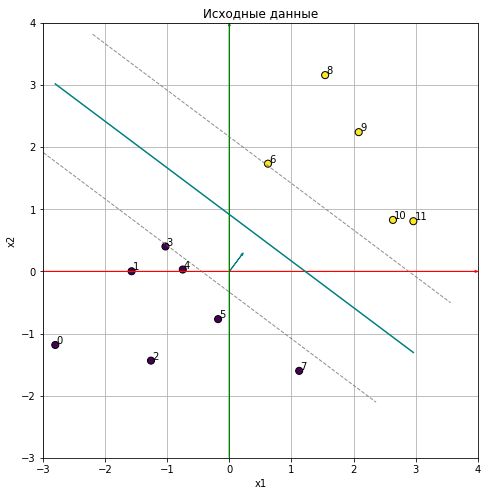

In [ ]:
# Параметры распределения признаков
# MU_A, MU_B - смещения вдоль прямой x2 = x1
# SIGMA - общее стандартное отклонение
MU_A, MU_B, SIGMA = -0.5, 1.5, 1

# Использовать гиперплоскость для разметки обучающей выборки
STRICT_SEPARATION = True

# Координаты нормали гиперплоскости для рзаметки [w0, w1, w2]
W = np.array([-0.275, 0.225, 0.3])

# Расстояние от разделяющей гиперплоскости, на котором объекты удаляются, т.е.
# полуширина "пробора", свободного от объектов. Позволяет достичь 100% точности
# разделения классов на обучающей выборке
CLEAR_DIST = 1

# Матрица признаков и целевой признак. Отсортируем по x1, пригодится
n = 20
n_a = np.floor(n / 2).astype(int)
n_b = np.ceil(n / 2).astype(int)
x0 = [1] * n # Фиктивный признак
x1 = np.hstack((MU_A + SIGMA * np.random.randn(n_a), MU_B + SIGMA * np.random.randn(n_b)))
x2 = np.hstack((MU_A + SIGMA * np.random.randn(n_a), MU_B + SIGMA * np.random.randn(n_b)))
y = np.hstack((-np.ones(n_a), np.ones(n_b)))
X = pd.DataFrame(np.column_stack((x0, x1, x2, y)), columns=['x0', 'x1', 'x2', 'y'])
X = X.sort_values(by='x1').reset_index(drop=True)
y = X.y.to_numpy()
del X['y']

# Выборка из-за удаления объектов в пределах CLEAR_DIST от гиперплоскости далее
# в общем случае меняет размер, поэтому определяем ее размер через len(X)
del n, n_a, n_b

# Разделяющая гиперплоскость (линия на графике ниже)
hp = pd.DataFrame({'x0': X.x0, 'x1': X.x1})
hp['x2'] = (-hp.x1 * W[1] - hp.x0 * W[0]) / W[2]

# Если установлено строгое разделение классов
if STRICT_SEPARATION:
  # Перед разметкой объектов вычислим дистанцию, чтобы удалить объекты в заданных
  # пределах от гиперплоскости
  X['d'] = X @ W / np.linalg.norm(W[1:])
  X = X.drop(X[abs(X.d) <= CLEAR_DIST].index)
  X = X.reset_index(drop=True)

  # Разметка, генерируем целевой признак
  y = np.sign(X.d).astype(int).to_numpy()
  del X['d']

y_01 = pd.Series(y).replace(-1, 0).to_numpy()

print('Первые несколько строк матрицы признаков:\n', X.head(), '\n')

print('Вектор весов:\n', W)

# Координаты границ области, свободной от объектов
ba = hp - CLEAR_DIST * W / np.linalg.norm(W[1:])
bb = hp + CLEAR_DIST * W / np.linalg.norm(W[1:])

# Невообразимая красота
_, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X.x1, X.x2, c=y, s=50, edgecolor='black')
ax.plot(ba.x1, ba.x2, linestyle='--', lw=1, color='dimgrey', alpha=0.75)
ax.plot(bb.x1, bb.x2, linestyle='--', lw=1, color='dimgrey', alpha=0.75)
ax.plot(hp.x1, hp.x2, linestyle='-', color='teal')
ax.arrow(0, 0, W[1], W[2], length_includes_head=True, head_width=0.03, color='teal')
for i, r in X.iterrows():
  ax.annotate(i, (r.x1 + 0.02, r.x2 + 0.02))
get_shiny_square_axes(axes=ax, xlim=(-3, 4), ylim=(-3, 4), hw=0.03)
ax.set_title('Исходные данные')
plt.show()

In [ ]:
# Модель логистической регрессии
m = LogisticRegression(random_state=0).fit(X[['x1', 'x2']], y)
m_y_pred = m.predict(X[['x1', 'x2']])

# Точность и коэффициенты
m_w = np.hstack((m.intercept_, m.coef_.flatten()))
print(f'Точность на обучающей выборке:\n {accuracy_score(y, m_y_pred):.2%}\n')
print(f'Коэффиценты обученной модели логистической регрессии:\n {m_w}')

Точность на обучающей выборке:
 100.00%

Коэффиценты обученной модели логистической регрессии:
 [-1.36953164  1.00314873  1.04243678]


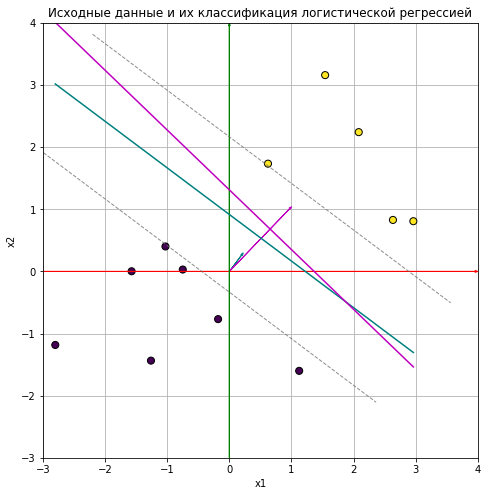

In [ ]:
m_hp = pd.DataFrame({'x0': X.x0, 'x1': X.x1})
m_hp['x2'] = (-m_hp.x1 * m_w[1] - m_hp.x0 * m_w[0]) / m_w[2]

_, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X.x1, X.x2, c=y, s=50, edgecolor='black')
ax.plot(ba.x1, ba.x2, linestyle='--', lw=1, color='dimgrey', alpha=0.75)
ax.plot(bb.x1, bb.x2, linestyle='--', lw=1, color='dimgrey', alpha=0.75)
ax.plot(hp.x1, hp.x2, linestyle='-', color='teal')
ax.plot(m_hp.x1, m_hp.x2, linestyle='-', color='m')
ax.arrow(0, 0, W[1], W[2], length_includes_head=True, head_width=0.03, color='teal')
ax.arrow(0, 0, m_w[1], m_w[2], length_includes_head=True, head_width=0.03, color='m')
get_shiny_square_axes(axes=ax, xlim=(-3, 4), ylim=(-3, 4), hw=0.03)
ax.set_title('Исходные данные и их классификация логистической регрессией')
plt.show()

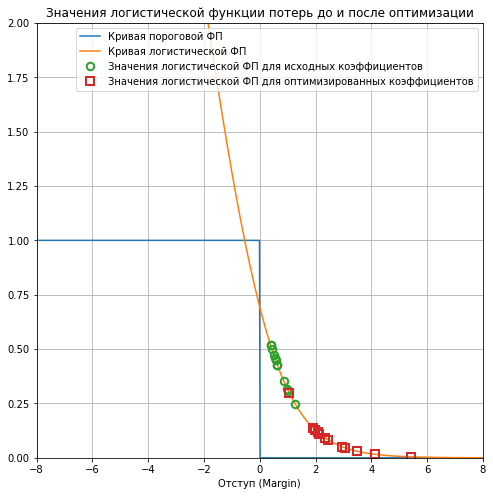

In [ ]:
m_ = np.linspace(-10, 10, 1000)

# Для исходных данных, размеченных при генерации
m = margin(X @ W, y)
ll = logistic_loss(m)

# Для данных, размеченных обученной моделью логистической регресии
m_m = margin(X @ m_w, m_y_pred)
m_ll = logistic_loss(m_m)

_, ax = plt.subplots(figsize=(8, 8))
ax.plot(m_, threshold_loss(m_))
ax.plot(m_, logistic_loss(m_), ls='-')
ax.plot(m, ll, ls='', marker='o', mew=2, mfc='None', ms=7.5)
ax.plot(m_m, m_ll, ls='', marker='s', mew=2, mfc='None', ms=7.5)
ax.set_xlim(-8, 8)
ax.set_ylim(0, 2)
ax.grid(True)
ax.legend(['Кривая пороговой ФП', 'Кривая логистической ФП', 'Значения логистической ФП для исходных коэффициентов', 'Значения логистической ФП для оптимизированных коэффициентов'])
ax.set_xlabel('Значение фукнции потерь')
ax.set_xlabel('Отступ (Margin)')
ax.set_title('Значения логистической функции потерь до и после оптимизации')
plt.show()

## Вывод

Функции потерь. Красивые и разные.